In [1]:
import random

In [2]:
# random decimal between 0 and 1
random.random()

0.5579594117881912

In [3]:
# random whole number divisible by step-increment within range
random.randrange(-90,90,step=5)

-35

In [4]:
# random whole number within range
random.randint(-90,90)

64

In [5]:
# random decimal within range
random.uniform(-90,90)

68.74081983264179

In [6]:
# creates a list of 10 random latitude points between -90 and 89

x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1
    
latitudes

[-41.77343127280975,
 -76.78195793881522,
 79.31450157457951,
 -11.157136888363103,
 -38.18736693301277,
 26.634770106586984,
 -48.77671913255877,
 -23.33311120098426,
 81.01641350916542,
 -41.471035542014704]

In [7]:
# Import the NumPy module.
import numpy as np

In [8]:
# creates (size) array of random decimals within range
np.random.uniform(-90,90, size=50)

array([-76.13104739,  -8.9605106 , -37.09493765, -48.14167605,
       -84.19536274, -33.62128709, -15.02282179,  50.12061612,
       -49.32255351,  42.00686696,  41.78147304, -24.63843072,
       -48.84182618,  20.90964008,   8.19451466, -55.931819  ,
        66.9693612 , -82.6654373 ,  57.16469269,  -6.03835975,
       -87.04762579,  12.70135193,  29.97168347,   2.89000894,
       -35.91767866,  15.54038301,   5.07015265, -57.89706995,
       -85.87757971, -85.34689809, -12.80743398, -19.54820252,
        65.87435626, -47.66452957, -79.62427023,  83.96526188,
       -53.62123912,   6.1674973 ,  71.73292506, -13.58318718,
        64.55501369, -72.25233376,  -6.06498659,  -7.84792422,
        43.81563231,  60.9681126 ,  13.56413904, -68.56539115,
        71.90952633,   2.47104509])

In [9]:
# Import timeit.
import timeit

In [10]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

22.9 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes

# Call the function with 1500.
%timeit latitudes(1500)

3.25 ms ± 458 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Create Lat and Long combinations

In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Practice

In [14]:
# Create a practice set of random latitude and longitude combinations.
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats, lngs)

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


# API Practice

In [17]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


# Make an API Call

In [19]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [21]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Austin"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=84e1c688221197e1cbe08170c34b34ae&q=Austin


In [22]:

weather_response = requests.get(city_url)
weather_json = weather_response.json()

In [23]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [24]:
weather_json.get("main")

{'temp': 64.87,
 'feels_like': 64.58,
 'temp_min': 63.18,
 'temp_max': 66.87,
 'pressure': 1021,
 'humidity': 75}

In [25]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [26]:
#status code
city_weather.status_code

200

In [27]:
# Create an endpoint URL for a city. ERROR 404
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [28]:
# Create an endpoint URL for a city. FIXED
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [29]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":85.03,"feels_like":89.29,"temp_min":73.65,"temp_max":92.79,"pressure":1015,"humidity":60},"visibility":10000,"wind":{"speed":4,"deg":135,"gust":7},"clouds":{"all":2},"dt":1653229311,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1653210996,"sunset":1653264332},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [30]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 85.03,
  'feels_like': 89.29,
  'temp_min': 73.65,
  'temp_max': 92.79,
  'pressure': 1015,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 135, 'gust': 7},
 'clouds': {'all': 2},
 'dt': 1653229311,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1653210996,
  'sunset': 1653264332},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

# Handle Request Errors

In [31]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


# Parse a Response

In [32]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 85.03,
  'feels_like': 89.29,
  'temp_min': 73.65,
  'temp_max': 92.79,
  'pressure': 1015,
  'humidity': 60},
 'visibility': 10000,
 'wind': {'speed': 4, 'deg': 135, 'gust': 7},
 'clouds': {'all': 2},
 'dt': 1653229311,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1653210996,
  'sunset': 1653264332},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [33]:
# Get the JSON data.
boston_data = city_weather.json()

In [34]:
boston_data['coord']['lat']

42.3584

In [35]:
boston_data['main']['temp_max']

92.79

In [36]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]

print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 92.79 60 2 4


# Convert the Date Timestamp

In [37]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-05-22 14:21:51'

# More

# Get City Weather Data

In [38]:
# Import the time library and the datetime module from the datetime library 
# Import the dependencies.
import os  ## needed to change dir to import keys from different folder
import requests  ## needed for web crawls 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import time

In [39]:
from config import weather_api_key

In [40]:
# Create a set of random latitude and longitude combinations.
# chain np and random 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) ## packs both variables into a tupled zip file
lat_lngs # show me the zip file

In [41]:
# add longs and lats to a coordinates list
coordinates = list(lat_lngs) #write the zip file into a list, so you can work with it

In [42]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [43]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [44]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): 
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bermeo
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | lypnyazhka
Processing Record 5 of Set 1 | tuatapere
Processing Record 6 of Set 1 | shimoda
Processing Record 7 of Set 1 | leonidion
City not found. Skipping...
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | tabialan
City not found. Skipping...
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | katsuura
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | oga
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | sao jose do calcado
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | amderma
City not f

Processing Record 35 of Set 4 | taihe
Processing Record 36 of Set 4 | kondol
Processing Record 37 of Set 4 | quatre cocos
Processing Record 38 of Set 4 | khipro
Processing Record 39 of Set 4 | pemba
Processing Record 40 of Set 4 | port blair
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | college
Processing Record 43 of Set 4 | cockburn town
Processing Record 44 of Set 4 | acajutla
Processing Record 45 of Set 4 | havelock
Processing Record 46 of Set 4 | byron bay
Processing Record 47 of Set 4 | saint-joseph
Processing Record 48 of Set 4 | batsfjord
Processing Record 49 of Set 4 | vanimo
Processing Record 50 of Set 4 | pathein
Processing Record 1 of Set 5 | norfolk
Processing Record 2 of Set 5 | victor harbor
Processing Record 3 of Set 5 | bantry
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | noumea
Processing Record 6 of Set 5 | qaanaaq
Processing Record 7 of Set 5 | yulara
Processing Record 8 of Set 5 | eenhana
Processing Record

City not found. Skipping...
Processing Record 20 of Set 8 | vila franca do campo
Processing Record 21 of Set 8 | warqla
City not found. Skipping...
Processing Record 22 of Set 8 | seredka
Processing Record 23 of Set 8 | westport
Processing Record 24 of Set 8 | teruel
Processing Record 25 of Set 8 | hereford
Processing Record 26 of Set 8 | tadine
Processing Record 27 of Set 8 | battonya
Processing Record 28 of Set 8 | kodinsk
Processing Record 29 of Set 8 | ganzhou
Processing Record 30 of Set 8 | iida
Processing Record 31 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 32 of Set 8 | khandyga
Processing Record 33 of Set 8 | mucuri
Processing Record 34 of Set 8 | beloha
Processing Record 35 of Set 8 | bandarbeyla
Processing Record 36 of Set 8 | matara
Processing Record 37 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 38 of Set 8 | ondjiva
Processing Record 39 of Set 8 | yalutorovsk
Processing Record 40 of Set 8 | russell
Processing Record 41 of 

Processing Record 11 of Set 12 | maglavit
Processing Record 12 of Set 12 | sai buri
Processing Record 13 of Set 12 | novaya zaimka
Processing Record 14 of Set 12 | suntar
Processing Record 15 of Set 12 | montorio al vomano
Processing Record 16 of Set 12 | egvekinot
Processing Record 17 of Set 12 | vestmannaeyjar
Processing Record 18 of Set 12 | troitsko-pechorsk
Processing Record 19 of Set 12 | berea
Processing Record 20 of Set 12 | finschhafen
Processing Record 21 of Set 12 | severo-yeniseyskiy
Processing Record 22 of Set 12 | pemberton
Processing Record 23 of Set 12 | rognan
Processing Record 24 of Set 12 | san carlos de bariloche
Processing Record 25 of Set 12 | teya
Processing Record 26 of Set 12 | kelheim
Processing Record 27 of Set 12 | tashtyp
Processing Record 28 of Set 12 | bara
Processing Record 29 of Set 12 | santa maria
Processing Record 30 of Set 12 | iranshahr
Processing Record 31 of Set 12 | jalapa
Processing Record 32 of Set 12 | riwaka
Processing Record 33 of Set 12 | 

# Create a DataFrame of City Weather Data

In [45]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bermeo,43.4209,-2.7215,88.41,59,100,11.03,ES,2022-05-22 14:29:49
1,Punta Arenas,-53.1500,-70.9167,37.51,70,75,14.97,CL,2022-05-22 14:22:24
2,Thompson,55.7435,-97.8558,51.96,46,20,5.75,CA,2022-05-22 14:26:34
3,Lypnyazhka,48.4469,31.0761,60.85,57,76,20.18,UA,2022-05-22 14:29:49
4,Tuatapere,-46.1333,167.6833,46.36,83,98,8.46,NZ,2022-05-22 14:29:50
5,Shimoda,34.6667,138.9500,65.86,91,34,7.99,JP,2022-05-22 14:29:50
6,Talnakh,69.4865,88.3972,34.21,100,100,2.30,RU,2022-05-22 14:29:51
7,Albany,42.6001,-73.9662,83.26,65,49,5.99,US,2022-05-22 14:23:05
8,Mataura,-46.1927,168.8643,43.97,94,99,6.38,NZ,2022-05-22 14:23:04
9,Lebu,-37.6167,-73.6500,54.75,97,100,22.62,CL,2022-05-22 14:28:31


In [49]:
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bermeo,ES,2022-05-22 14:29:49,43.4209,-2.7215,88.41,59,100,11.03
1,Punta Arenas,CL,2022-05-22 14:22:24,-53.1500,-70.9167,37.51,70,75,14.97
2,Thompson,CA,2022-05-22 14:26:34,55.7435,-97.8558,51.96,46,20,5.75
3,Lypnyazhka,UA,2022-05-22 14:29:49,48.4469,31.0761,60.85,57,76,20.18
4,Tuatapere,NZ,2022-05-22 14:29:50,-46.1333,167.6833,46.36,83,98,8.46
5,Shimoda,JP,2022-05-22 14:29:50,34.6667,138.9500,65.86,91,34,7.99
6,Talnakh,RU,2022-05-22 14:29:51,69.4865,88.3972,34.21,100,100,2.30
7,Albany,US,2022-05-22 14:23:05,42.6001,-73.9662,83.26,65,49,5.99
8,Mataura,NZ,2022-05-22 14:23:04,-46.1927,168.8643,43.97,94,99,6.38
9,Lebu,CL,2022-05-22 14:28:31,-37.6167,-73.6500,54.75,97,100,22.62


In [51]:
# Create the output file (CSV) in the weather_data folder.
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get Data for Plotting

In [52]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [56]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1653232011.0612116

In [57]:
# Get today's date in mo/day/year format
today_date = time.strftime("%x")
today_date

'05/22/22'

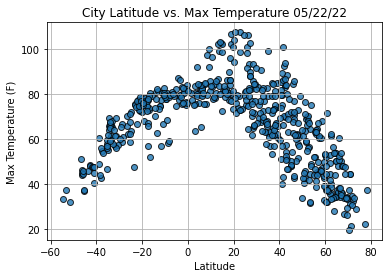

In [62]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

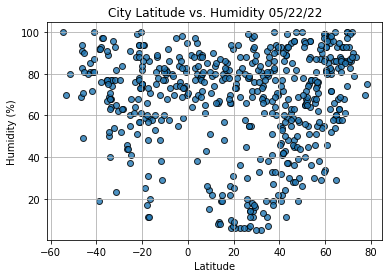

In [63]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

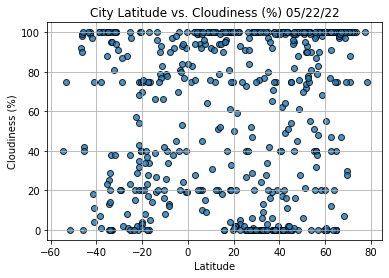

In [64]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

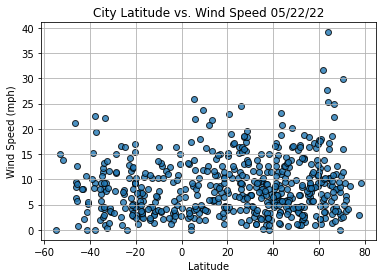

In [65]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# Linear Regression

In [75]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

NameError: name 'x_values' is not defined

In [88]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

# Northern Hemi Data

In [79]:
index13 = city_data_df.loc[13]
index13

City                          Oga
Country                        IT
Date          2022-05-22 14:29:51
Lat                       46.4631
Lng                        10.347
Max Temp                    70.81
Humidity                       48
Cloudiness                     95
Wind Speed                   4.79
Name: 13, dtype: object

In [82]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bermeo,ES,2022-05-22 14:29:49,43.4209,-2.7215,88.41,59,100,11.03
2,Thompson,CA,2022-05-22 14:26:34,55.7435,-97.8558,51.96,46,20,5.75
3,Lypnyazhka,UA,2022-05-22 14:29:49,48.4469,31.0761,60.85,57,76,20.18
5,Shimoda,JP,2022-05-22 14:29:50,34.6667,138.9500,65.86,91,34,7.99
6,Talnakh,RU,2022-05-22 14:29:51,69.4865,88.3972,34.21,100,100,2.30


In [83]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

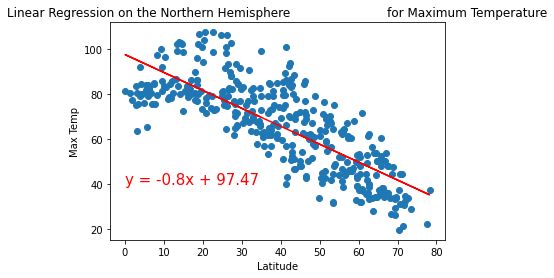

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,40))

# Southern Hemi Data

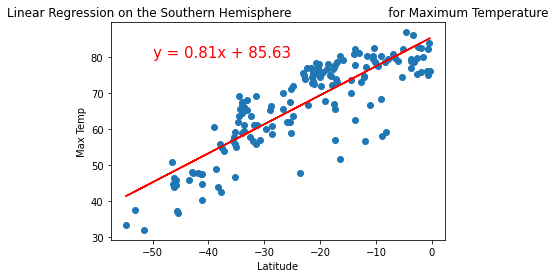

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

# Correlation between Lat and %Hum

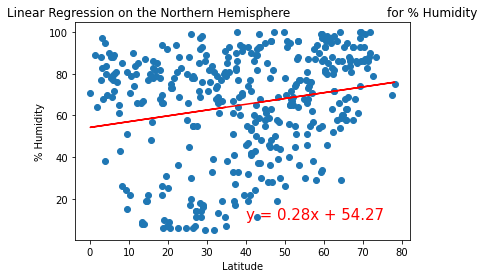

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

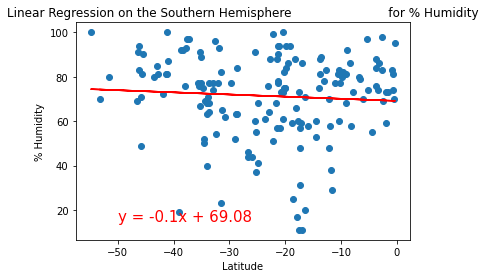

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

# Correlation between Lat and %Cloud

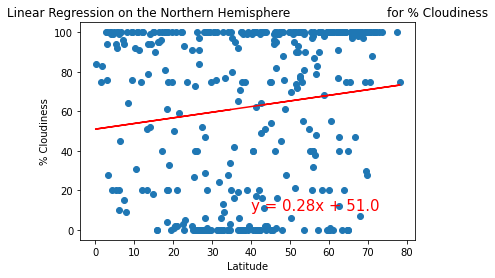

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

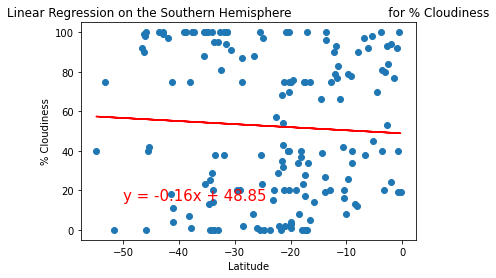

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

# Correlation between Lat and Wind Speed

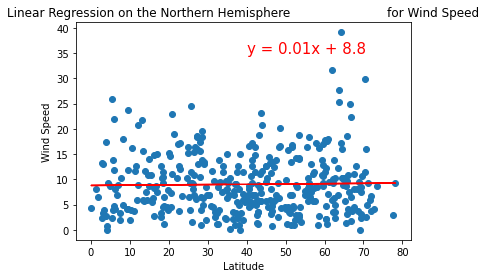

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

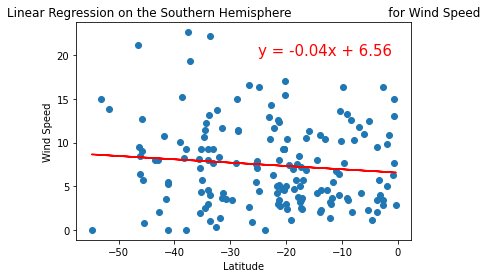

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25, 20))